In [2]:
import sys
import pickle
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plt.style.use("classic")
import seaborn as sns
from scipy import stats

sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [356]:
pp = pprint.PrettyPrinter(indent=4)
sns.set()
sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

# suppress scientific notation in Pandas
pd.options.display.float_format = "{:.2f}".format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['figure.dpi'] = 150

# Data Exploration

In [ ]:
# num persons (rows)
# list of names 
# persons of interest
# # Of these three individuals (Lay, Skilling and Fastow), who took home the most money (largest value of "total_payments" feature)? How much money did that person get?

# Task 1: Select Features

- Task 1: Select what features you'll use.
- features_list is a list of strings, each of which is a feature name.
- The first feature must be "poi".

In [6]:
features_list = [
    "poi",
    "salary",
    "bonus",
    "long_term_incentive",
    "exercised_stock_options",
    "total_payments",
]  # You will need to use more features

In [235]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
# display(data_dict)
list(data_dict.items())[0]

('METTS MARK',
 {'bonus': 600000,
  'deferral_payments': 'NaN',
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'mark.metts@enron.com',
  'exercised_stock_options': 'NaN',
  'expenses': 94299,
  'from_messages': 29,
  'from_poi_to_this_person': 38,
  'from_this_person_to_poi': 1,
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 1740,
  'poi': False,
  'restricted_stock': 585062,
  'restricted_stock_deferred': 'NaN',
  'salary': 365788,
  'shared_receipt_with_poi': 702,
  'to_messages': 807,
  'total_payments': 1061827,
  'total_stock_value': 585062})

In [231]:
discovery_df = pd.DataFrame(data_dict).transpose()
display(discovery_df.head())

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,NaN,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,NaN,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,NaN,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,NaN,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [232]:
discovery_df.describe()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
unique,42,40,45,18,112,102,95,65,58,42,5,53,93,2,98,19,95,84,87,126,125
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,64,107,97,129,35,44,51,60,60,60,142,80,53,128,36,128,51,60,60,21,20


In [234]:
# define 'NaN' strings as numpy NaNs
discovery_df[discovery_df == 'NaN'] = np.nan

# sort the features by the % NaN values for the feature
((discovery_df.isna().sum() / len(discovery_df.index)) * 100).sort_values()

poi                          0.00
total_stock_value           13.70
total_payments              14.38
email_address               23.97
restricted_stock            24.66
exercised_stock_options     30.14
salary                      34.93
expenses                    34.93
other                       36.30
to_messages                 41.10
shared_receipt_with_poi     41.10
from_messages               41.10
from_poi_to_this_person     41.10
from_this_person_to_poi     41.10
bonus                       43.84
long_term_incentive         54.79
deferred_income             66.44
deferral_payments           73.29
restricted_stock_deferred   87.67
director_fees               88.36
loan_advances               97.26
dtype: float64

Interesting to note that every POI has a value for the POI feature

# Task 2: Remove outliers

In [302]:
# remove the TOTAL key from the dict because it's an outlier in the data
# TOTAL represents an aggregate value
# 'THE TRAVEL AGENCY IN THE PARK' doesn't represent a person
df.drop(['TOTAL', 'THE TRAVEL AGENCY IN THE PARK'])

numRows, numCols = df.shape

# transpose the DF if the features are set as rows
if numRows < numCols:
    df = pd.DataFrame(df).transpose()

df[features_list].head()

,poi,salary,bonus,long_term_incentive,exercised_stock_options,total_payments
ALLEN PHILLIP K,False,201955,4175000,304805,1729541,4484442
BADUM JAMES P,False,NaN,NaN,NaN,257817,182466
BANNANTINE JAMES M,False,477,NaN,NaN,4046157,916197
BAXTER JOHN C,False,267102,1200000,1586055,6680544,5634343
BAY FRANKLIN R,False,239671,400000,NaN,NaN,827696


In [290]:
# TODO: What percentage of POI's in dataset are missing info for this feature?
def summarizeFeature(feature):
    print "\nSUMMARY FOR: '{}'".format(feature.upper())
    print "=" * 25
    print(df[feature].astype(np.float64).describe())
    print
    
# summarize selected features (except for POI)    
for feature in features_list[1:]:
    summarizeFeature(feature)    


SUMMARY FOR: 'SALARY'
count         95.00
mean      562194.29
std      2716369.15
min          477.00
25%       211816.00
50%       259996.00
75%       312117.00
max     26704229.00
Name: salary, dtype: float64


SUMMARY FOR: 'BONUS'
count         82.00
mean     2374234.61
std     10713327.97
min        70000.00
25%       431250.00
50%       769375.00
75%      1200000.00
max     97343619.00
Name: bonus, dtype: float64


SUMMARY FOR: 'LONG_TERM_INCENTIVE'
count         66.00
mean     1470361.45
std      5942759.32
min        69223.00
25%       281250.00
50%       442035.00
75%       938672.00
max     48521928.00
Name: long_term_incentive, dtype: float64


SUMMARY FOR: 'EXERCISED_STOCK_OPTIONS'
count         102.00
mean      5987053.77
std      31062006.57
min          3285.00
25%        527886.25
50%       1310813.50
75%       2547724.00
max     311764000.00
Name: exercised_stock_options, dtype: float64


SUMMARY FOR: 'TOTAL_PAYMENTS'
count         125.00
mean      5081526.49
std      

In [357]:
def Draw(
    pred,
    features,
    poi,
    mark_poi=False,
    name="image.png",
    f1_name="feature 1",
    f2_name="feature 2",
):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color=colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()


In [332]:
def plotData(data_dict, features, xLabel, yLabel):
    data = featureFormat(data_dict, features=features)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title('POIs with {} and {}:'.format(yLabel.upper(), xLabel.upper()), loc='center')
    feature_x, feature_y = features

    zScores = abs(stats.zscore(data, axis=0))

    #  plot data points
    for index, (x, y) in enumerate(data):
        xZ, yZ = zScores[index]
        plt.scatter(x, y)
        
        # annotate the data point if X or Y is greater than 2 Stdevs.
        if xZ > 2 or yZ > 2:
            # find the person associated with the data point
            poi_name = next((key for (key, value) in data_dict.items() if value.get(feature_x) == x or value.get(feature_y) == y), None)
            
            ax.annotate("%s" % (poi_name), xy=(x, y), textcoords="data")

    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.grid(True)
    plt.figure()
    plt.show()

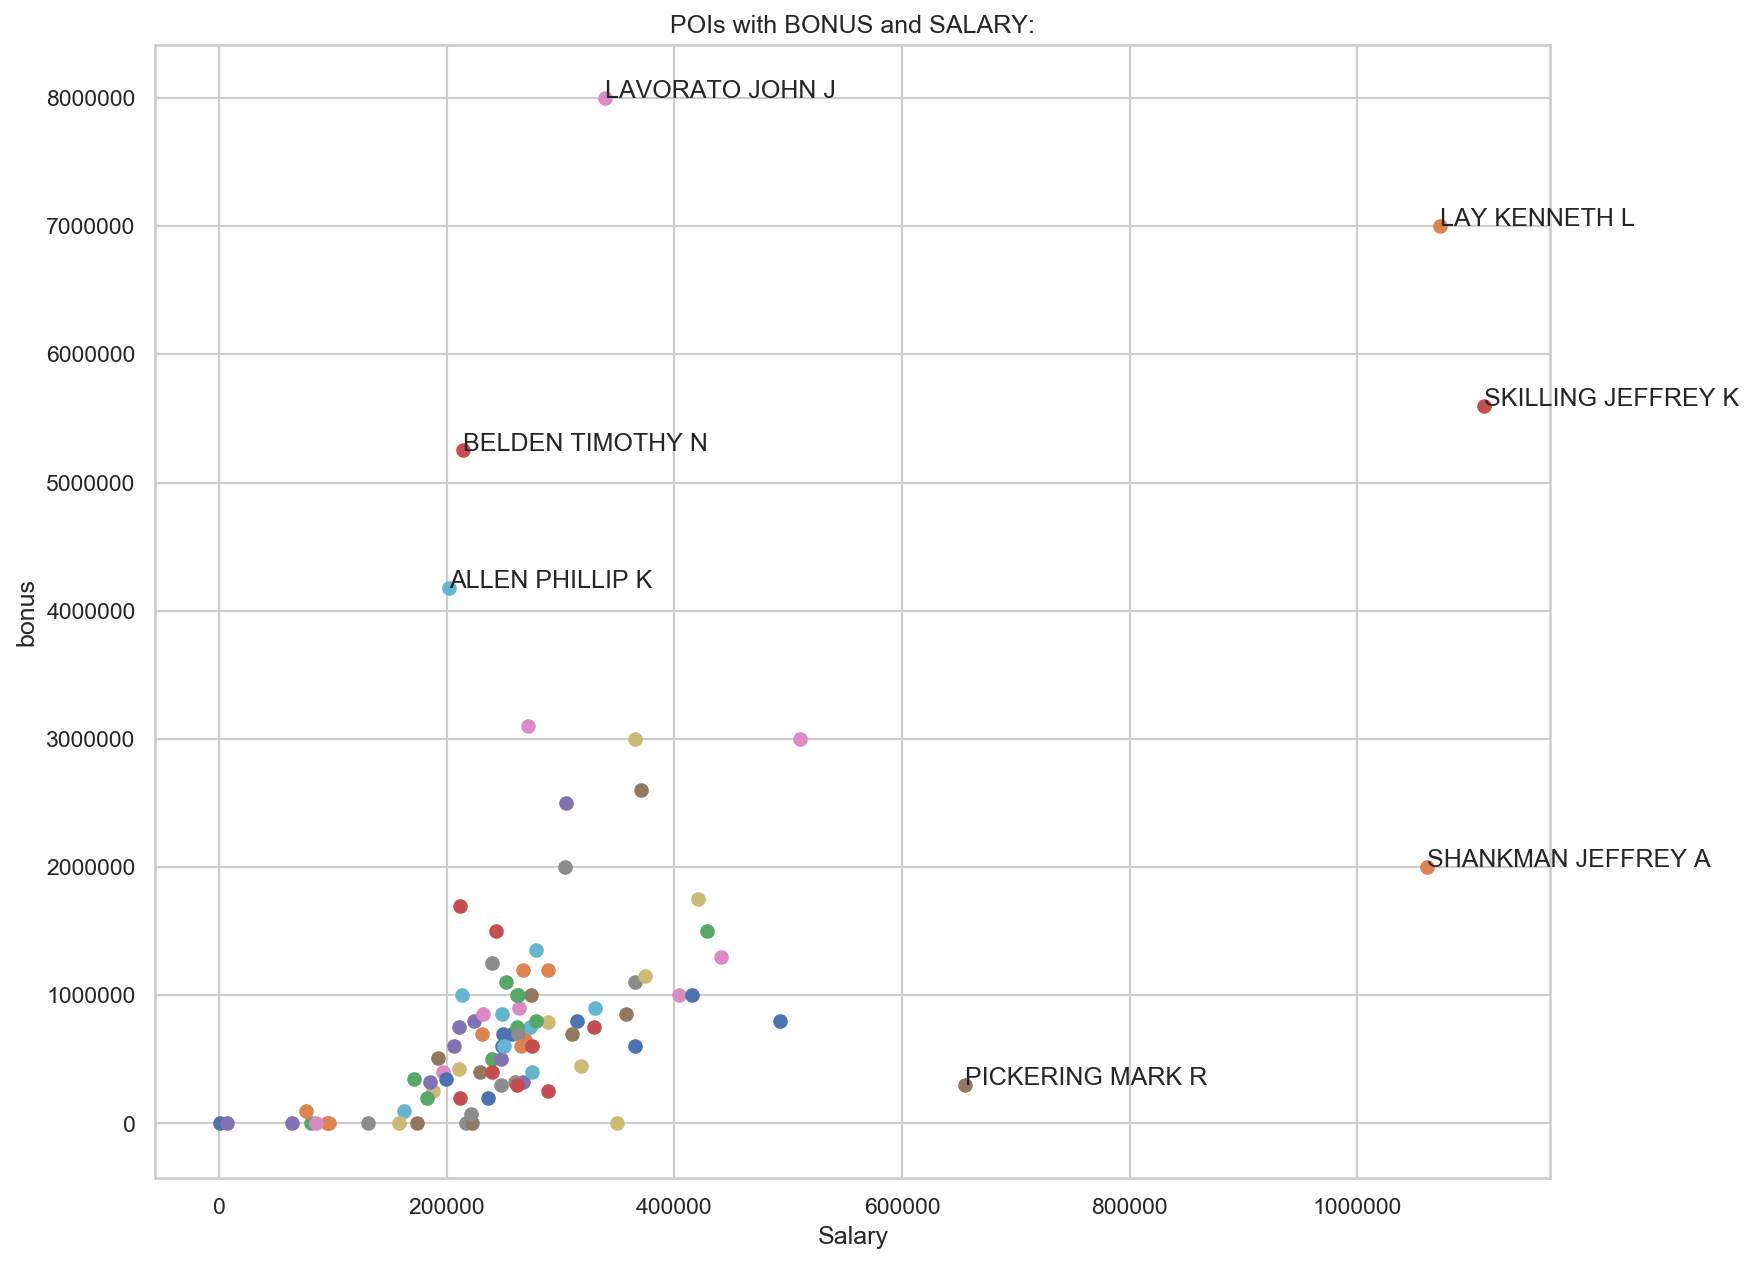

<Figure size 1800x1500 with 0 Axes>

In [333]:
plotData(data_dict, features=["salary", features_list[2]], xLabel="Salary", yLabel=features_list[2])

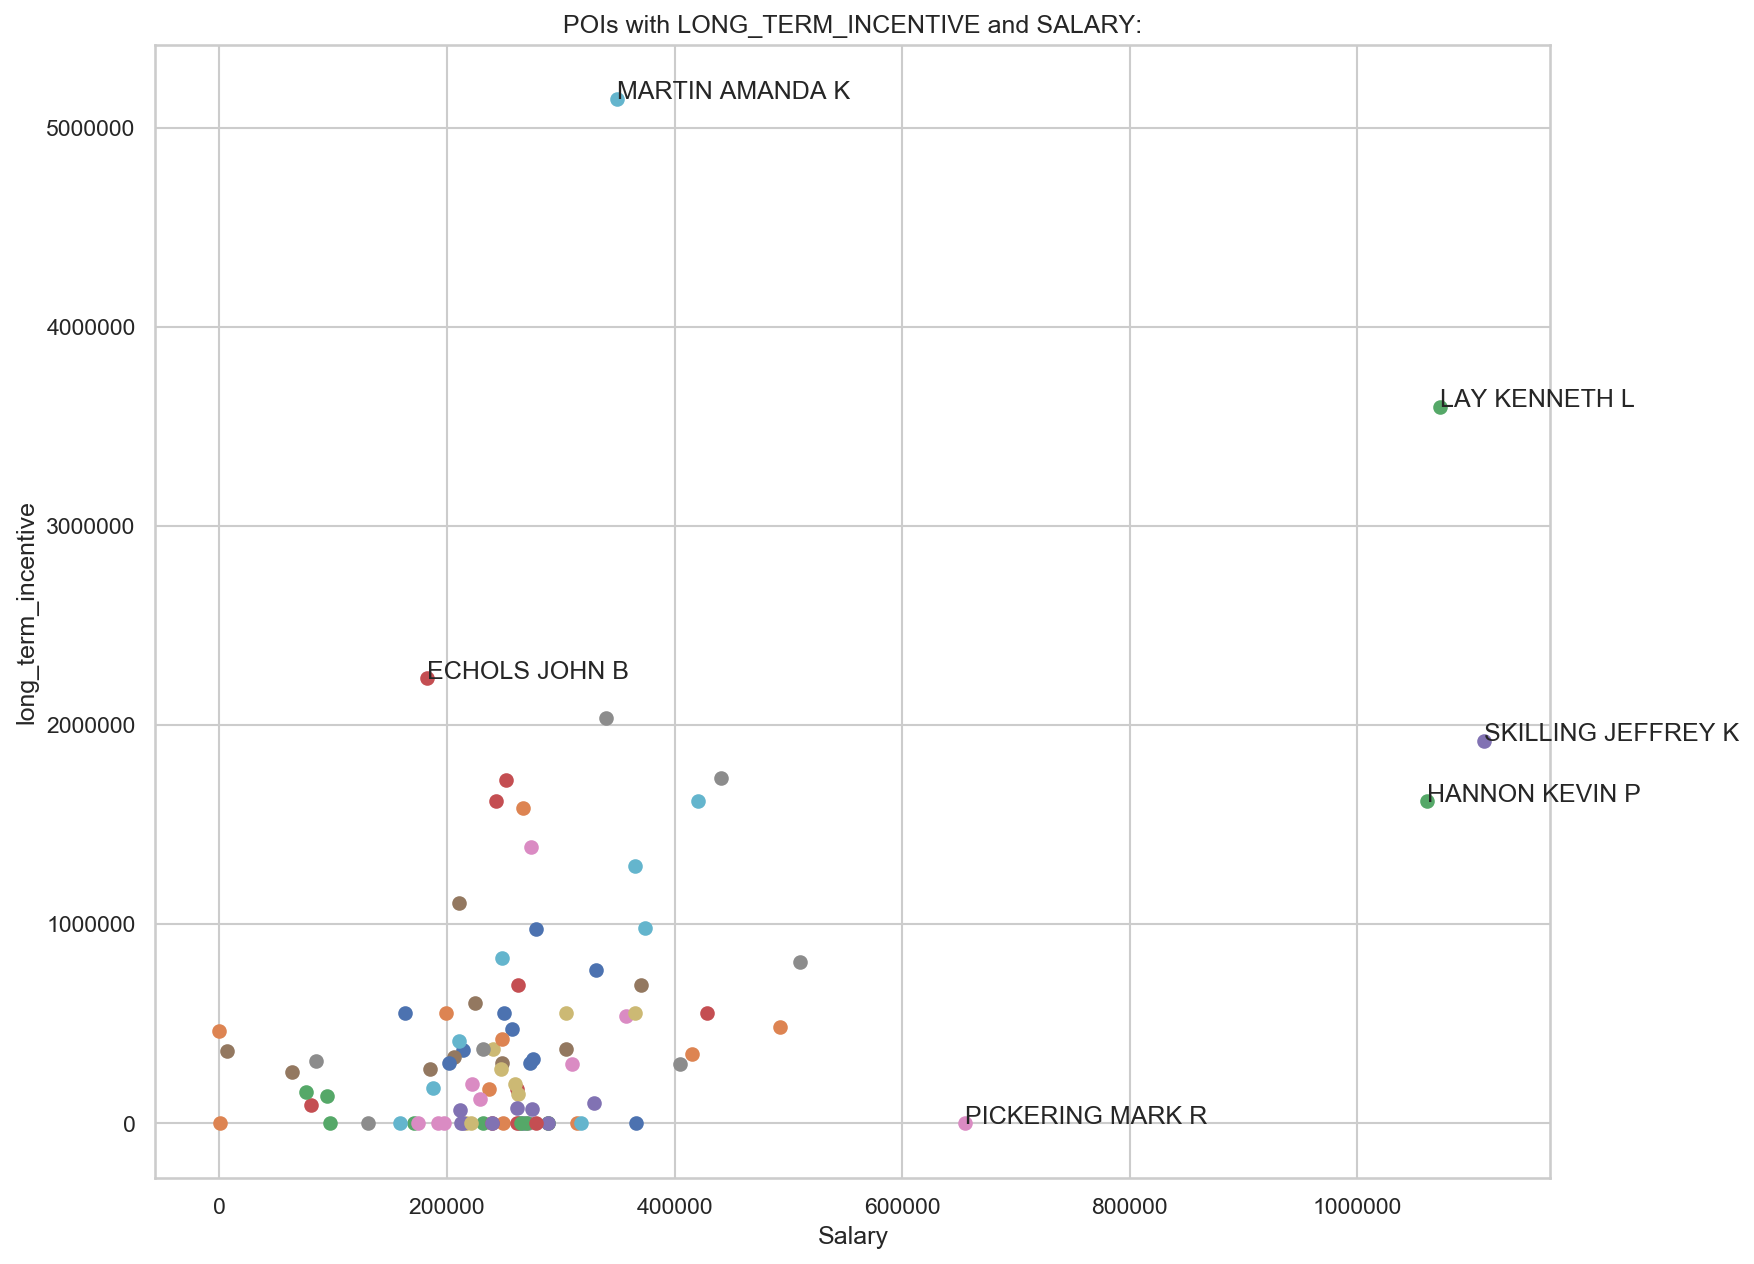

<Figure size 1800x1500 with 0 Axes>

In [334]:
plotData(data_dict, features=["salary", features_list[3]], xLabel="Salary", yLabel=features_list[3])

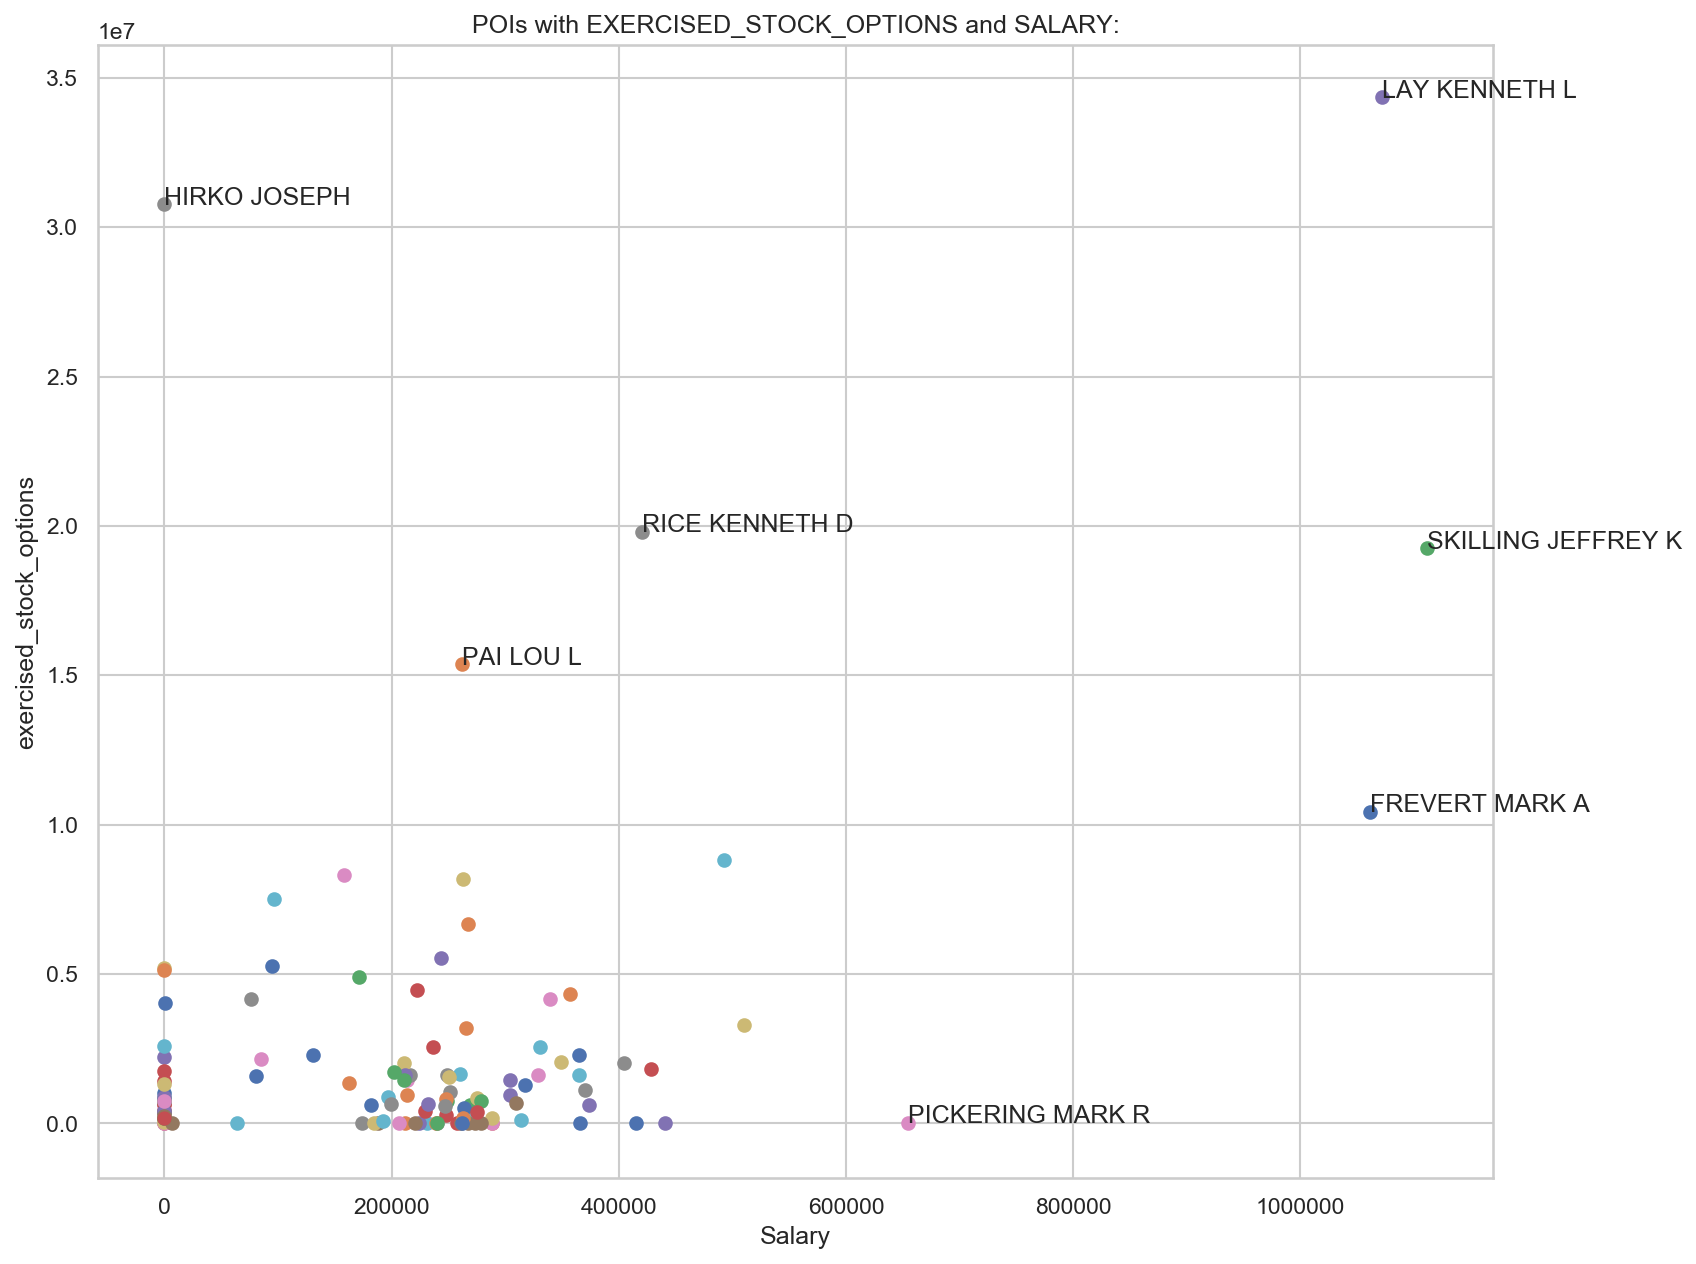

<Figure size 1800x1500 with 0 Axes>

In [335]:
plotData(data_dict, features=["salary", features_list[4]], xLabel="Salary", yLabel=features_list[4])

In [293]:
from pandas.io.json import json_normalize

salary_df = df[df.salary != 'NaN']
bonus_df = df[df.bonus != 'NaN']
long_term_incentive_df = df[df.long_term_incentive!= 'NaN']
exercised_stock_options_df = df[df.exercised_stock_options != 'NaN']
total_payments_df = df[df.total_payments != 'NaN']

total_payments_df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,NaN,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,NaN,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,NaN,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,NaN,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,NaN,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,NaN,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,NaN,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,NaN,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


# Task 3: Create Features

In [661]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

feature_1 = 'long_term_incentive'
feature_2 = 'bonus'
poi = 'poi'


# print(data_dict)
### Extract features and labels from dataset for local testing
# features_list = ['poi', 'salary', 'bonus', 'long_term_incentive', 'exercised_stock_options', 'total_payments']
data = featureFormat(my_dataset, [poi, feature_1, feature_2], sort_keys=True)
# data = featureFormat(my_dataset, features_list, sort_keys=True)
labels, features = targetFeatureSplit(data)

print "Number of original features: {}".format(len(features))


feat1, feat2 = zip(*features)
# feat1, feat2, _, _, _  = zip(*features)
feat1 = np.array(feat1).reshape((-1, 1))
feat2 = np.array(feat2).reshape((-1, 1))

scaler = MinMaxScaler()
rescaled_feat1 = scaler.fit_transform(feat1)

scaler = MinMaxScaler()
rescaled_feat2 = scaler.fit_transform(feat2)

# table comparing rescaled features
display(pd.DataFrame({'feat1': feat1.reshape(-1), 'rescaled_feat1': rescaled_feat1.reshape(-1), 'feat2': feat2.reshape(-1), 'rescaled_feat2': rescaled_feat2.reshape(-1)}, columns=['feat1', 'rescaled_feat1', 'feat2', 'rescaled_feat2']).head())

# zip normalized-features back together
features = zip(rescaled_feat1.reshape(-1), rescaled_feat2.reshape(-1))

features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.3, random_state=42
)

target_feature_df = pd.DataFrame(features)
# map numeric column names to feature names
col_names = {index -1: feature for (index, feature) in enumerate(features_list) if feature is not 'poi'}
target_feature_df.rename(columns=col_names)
print "Number of rescaled features: {}".format(len(features))

Number of original features: 89


,feat1,rescaled_feat1,feat2,rescaled_feat2
0,304805.00,0.06,4175000.00,0.52
1,1586055.00,0.31,1200000.00,0.15
2,0.00,0.00,400000.00,0.05
3,93750.00,0.02,0.00,0.00
4,0.00,0.00,700000.00,0.09


Number of rescaled features: 89


# Task 4: Try a variety of classifiers

In [558]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [347]:
clf = GaussianNB()

In [703]:
def printPredictions(predictions, features_test):
    print
    print("{} predictions / {} test data points".format(len(predictions), len(features_test)))
    print(list(predictions))
    print "{} POIs detected".format(len([n for n in predictions if n == 1]))
    print
    

# DecisionTreeClassifier

/Users/afterlab/opt/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best estimator found by grid search:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
('DECISION TREE Accuracy:', 0.8888888888888888)

<type 'numpy.ndarray'>
27 predictions / 27 test data points
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0 POIs detected



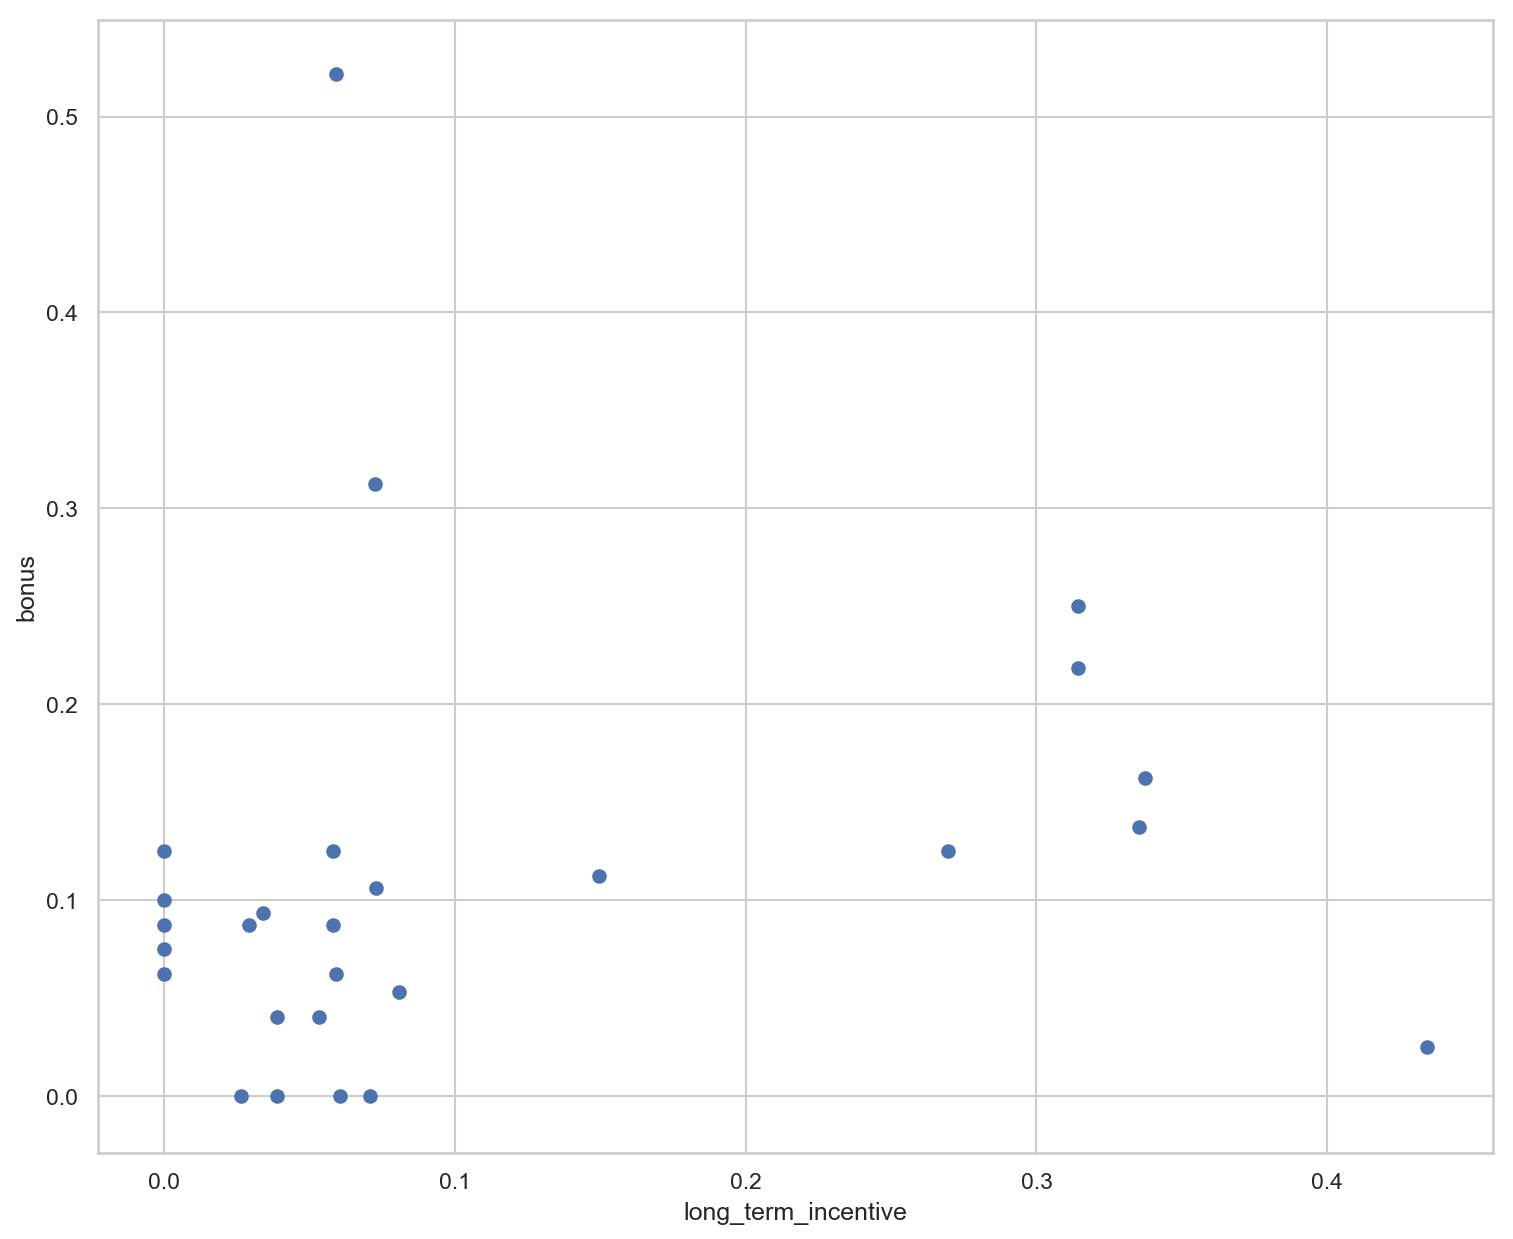

In [701]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 4, 6, 8, 10, 20, 30, 40]
}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid)

clf.fit(X=features_train, y=labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(
    y_true=labels_test, y_pred=pred, normalize=True, sample_weight=None
)

print "Best estimator found by grid search:"
print clf.best_estimator_

('DECISION TREE Accuracy with ALL features:', 0.8571428571428571)
('DECISION TREE (salary & bonus) Accuracy Before MinMaxScaler:', 0.7857142857142857)
('DECISION TREE (salary & bonus) Accuracy After MinMaxScaler:', 0.7586206896551724)
("DECISION TREE Accuracy: 'long_term_incentive', 'bonus'", 0.8888888888888888)
("DECISION TREE ('long_term_incentive', 'exercised_stock_options') Accuracy:", 0.8571428571428571)
("DECISION TREE ('long_term_incentive', 'total_payments') Accuracy:", 0.7368421052631579)
("DECISION TREE ('long_term_incentive', 'salary') Accuracy:", 0.7241379310344828)
print("DECISION TREE Accuracy:", acc)

# print("{} predictions / {} test data points".format(len(pred), len(features_test)))
# print(list(pred))

printPredictions(pred, features_test)

Draw(
    pred.astype(int),
    features_test,
    poi,
    mark_poi=False,
    name="clusters.pdf",
    f1_name=feature_1,
    f2_name=feature_2,
)

# ADA BOOST

/Users/afterlab/opt/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best estimator found by grid search:
AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=25, random_state=1)
('DECISION TREE Accuracy:', 0.9259259259259259)

27 predictions / 27 test data points
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
3 POIs detected



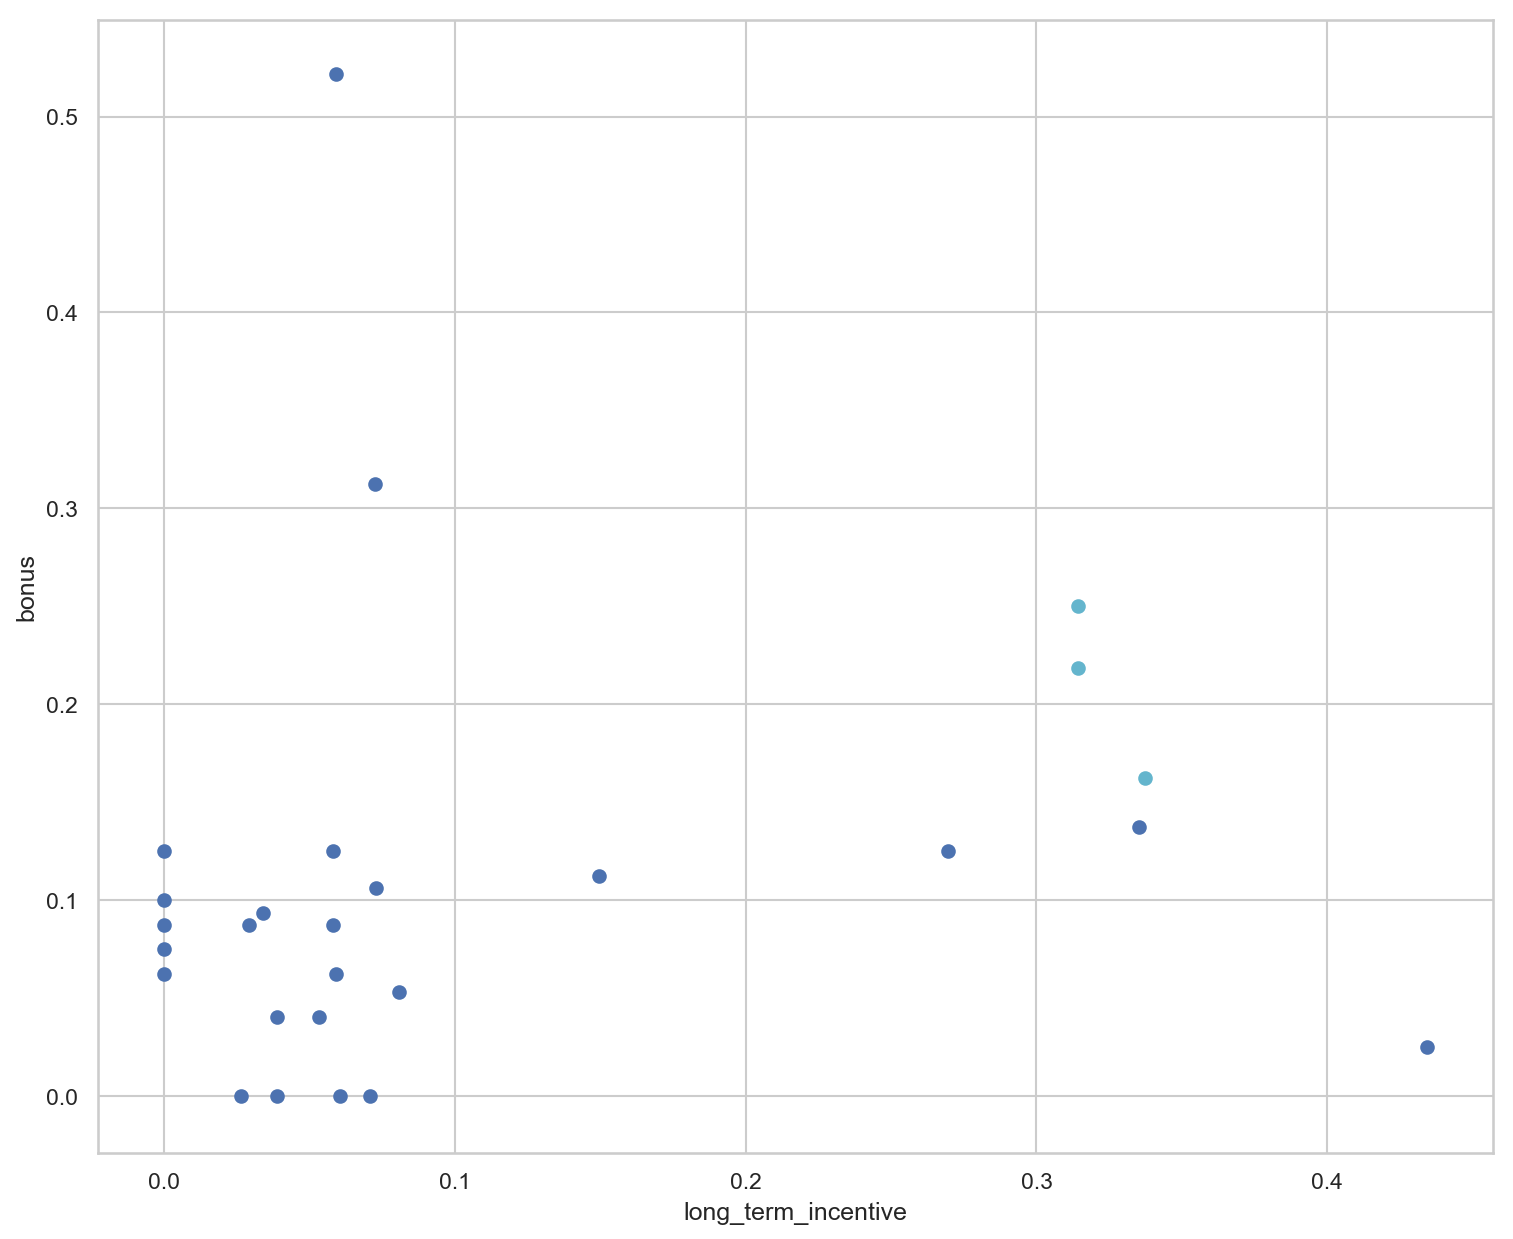

In [704]:
param_grid = {
    "n_estimators": [25, 50, 75, 100],
    "algorithm": ['SAMME', "SAMME.R"]
}

clf = GridSearchCV(AdaBoostClassifier(random_state=1), param_grid)

clf.fit(X=features_train, y=labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(
    y_true=labels_test, y_pred=pred, normalize=True, sample_weight=None
)

print "Best estimator found by grid search:"
print clf.best_estimator_

# ("DECISION TREE ('long_term_incentive', 'bonus') Accuracy:", 0.9259259259259259)
# ('DECISION TREE Accuracy ALL FEATURES:', 0.9047619047619048)
print("DECISION TREE Accuracy:", acc)

printPredictions(pred, features_test)

Draw(
    pred.astype(int),
    features_test,
    poi,
    mark_poi=False,
    name="clusters.pdf",
    f1_name=feature_1,
    f2_name=feature_2,
)


# RandomForestClassifier

In [ ]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "n_estimators": [5, 10, 25, 50, 75, 100],
    "max_depth": [2, 4, 6, 8, 10, 20],
    "min_samples_split": [2, 6, 10, 20, 30]
}


clf = GridSearchCV(RandomForestClassifier(), param_grid)
# clf.fit(X=features_train, y=labels_train)
clf.fit(X=features_train, y=labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(
    y_true=labels_test, y_pred=pred, normalize=True, sample_weight=None
)

print "Best estimator found by grid search:"
print clf.best_estimator_

# ('Random Forest Accuracy:', 0.9761904761904762)
# ('Random Forest Accuracy ALL features + MinMax:', 0.9285714285714286)
print("Random Forest Accuracy:", acc)

printPredictions(pred, features_test)

Draw(
    pred.astype(int),
    features_test,
    poi,
    mark_poi=False,
    name="clusters.pdf",
    f1_name=feature_1,
    f2_name=feature_2,
)

# KNeighborsClassifier

/Users/afterlab/opt/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best estimator found by grid search:
KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')
('KNN Accuracy:', 0.8518518518518519)

27 predictions / 27 test data points
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1 POIs detected



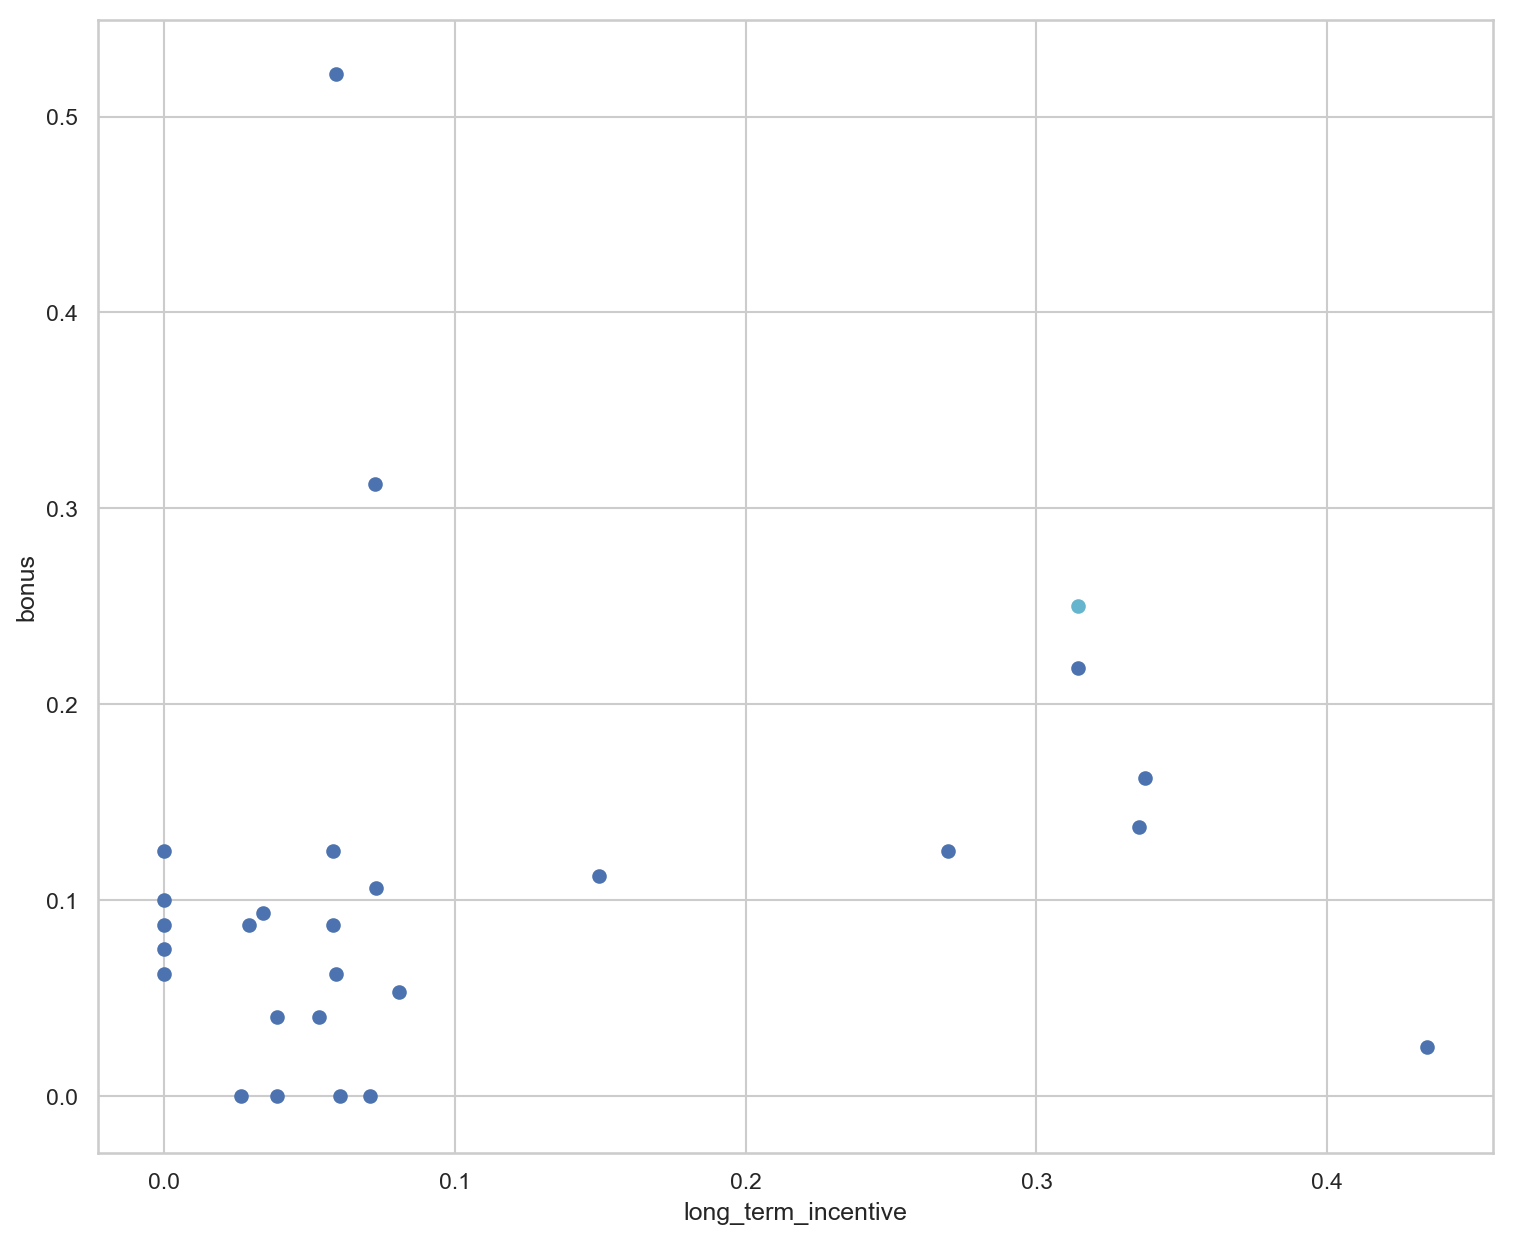

In [705]:
param_grid = {
    "n_neighbors": [2, 4, 6, 8, 10],
    "weights": ['uniform', 'distance'],
    "algorithm": ['ball_tree', 'kd_tree', 'brute', 'auto'],
    "leaf_size": [5, 10, 20, 30, 40, 50, 60],
    "p": [1, 2]
}

clf = GridSearchCV(KNeighborsClassifier(n_neighbors=3, weights="uniform", leaf_size=30, p=2), param_grid)

clf.fit(X=features_train, y=labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(
    y_true=labels_test, y_pred=pred, normalize=True, sample_weight=None
)

print "Best estimator found by grid search:"
print clf.best_estimator_


# ('KNN Accuracy With ALL before MinMaxScale:', 0.9523809523809523)
# ('KNN Accuracy after scaling:', 0.8518518518518519)
# ('KNN Accuracy With ALL after MinMax:', 0.9285714285714286)
# ('KNN Accuracy: WithALL after MinMax and tuning', 0.9761904761904762)
print("KNN Accuracy:", acc)

printPredictions(pred, features_test)

Draw(
    pred.astype(int),
    features_test,
    poi,
    mark_poi=False,
    name="clusters.pdf",
    f1_name=feature_1,
    f2_name=feature_2,
)


/Users/afterlab/opt/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

Best estimator found by grid search:
KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)
('Kmeans Accuracy:', 0.14814814814814814)

27 predictions / 27 test data points
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
26 POIs detected



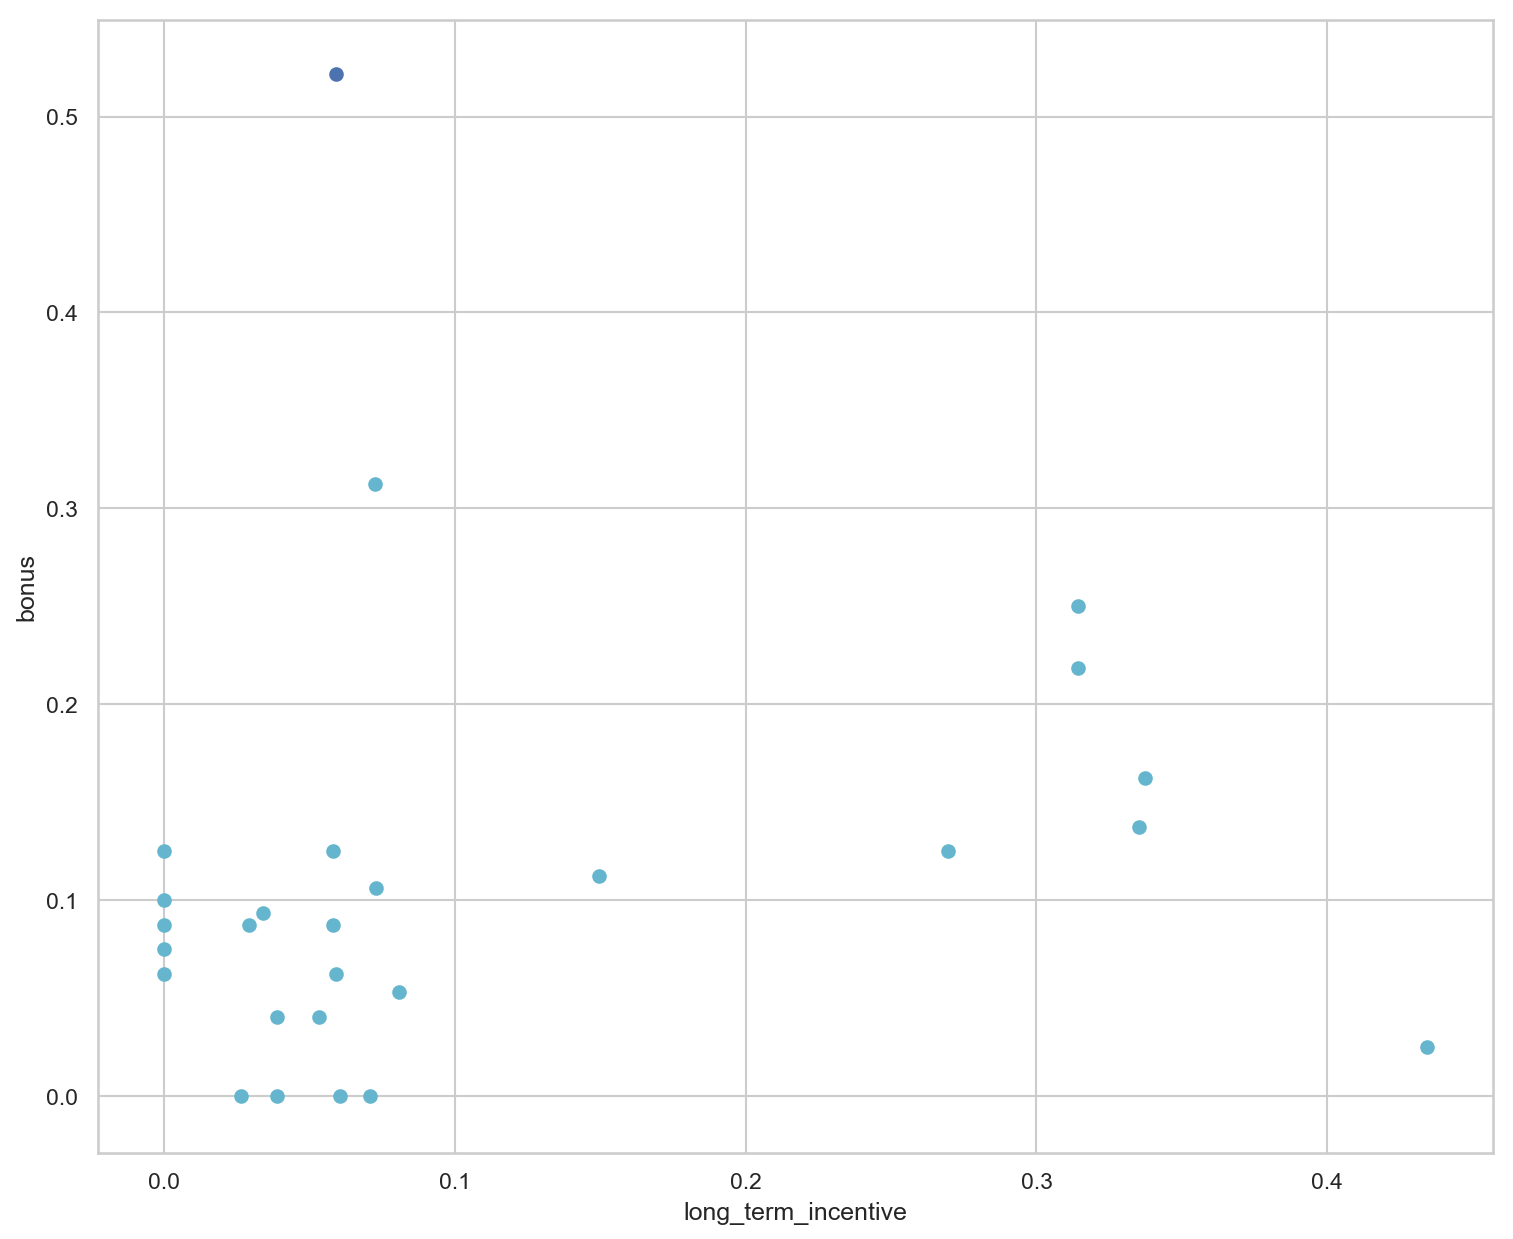

In [706]:
# KMEANS
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

param_grid = {
    "n_clusters": [2],
    "init": ['k-means++', 'random'],
    "n_init": [1,2,3,4,5, 10, 15, 20],
    "max_iter": [100, 200, 300, 400],
    "algorithm": ["auto", "full", "elkan"]
}

# KMeans?
# Compute k-means clustering.
kmeans = GridSearchCV(KMeans(random_state=1), param_grid)
kmeans.fit(X=features_train, y=labels_train)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(features_test)

display(pred)

# finance_features = zip(rescaled_salary, rescaled_stock)
# display(features_test)
print "Best estimator found by grid search:"
print kmeans.best_estimator_

acc = accuracy_score(
    y_true=labels_test, y_pred=pred, normalize=True, sample_weight=None
)

# ('Kmeans Accuracy with MinMax and 3 features:', 0.14814814814814814)
# ('Kmeans Accuracy: ALL features and MinMax', 0.47619047619047616)
print("Kmeans Accuracy:", acc)

printPredictions(pred, features_test)

Draw(
    pred,
    features_test,
    poi,
    mark_poi=False,
    name="clusters.pdf",
    f1_name=feature_1,
    f2_name=feature_2,
)


In [466]:
np.zeros((10, 2))
np.arange(6).reshape((3, 2))

array([[0, 1],
       [2, 3],
       [4, 5]])

In [628]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)
clf.fit(X=features_train, y=labels_train)

# >>> print(clf.coef_)
# [0.85 0.  ]
# >>> print(clf.intercept_)
# 0.15...

# features_to_predict_labels_for = [1,2]
# clf.predict([features_to_predict_labels_for])
clf.coef_

array([0., 0.])

# Task 5: Tune your classifier

In [425]:
from sklearn.preprocessing import MinMaxScaler

weights = np.array([[115.0], [140.0], [175.0]])
scaler = MinMaxScaler()
rescaled_weight = scaler.fit_transform(weights)
rescaled_weight

array([[0.        ],
       [0.41666667],
       [1.        ]])

# Task 6: Display

In [394]:
dump_classifier_and_data(clf, my_dataset, features_list)